In [15]:
import numpy as np 
import pandas as pd 

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

seed = 88

import os 

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from vecstack import stacking

from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Binarizer, StandardScaler

In [19]:
INPUT = '/media/tin/DATA/Kaggle/Mercedes/Input/'
OUTPUT = '/media/tin/DATA/Kaggle/Mercedes/Output/'

S_train = pd.read_csv(os.path.join(OUTPUT, '1stlevel_train2.csv'))
S_test = pd.read_csv(os.path.join(OUTPUT, '1stlevel_test2.csv'))

test_id = pd.read_csv(os.path.join(INPUT, 'test.csv'))["ID"]
y_train = pd.read_csv(os.path.join(INPUT, 'train.csv'))["y"]

#concatenate new to old
#S_train = pd.read_csv(os.path.join(OUTPUT,'S_train.csv'))
#S_test = pd.read_csv(os.path.join(OUTPUT,'S_test.csv'))

#S_train_con = pd.DataFrame(np.concatenate((S_train, S_train3), axis = 1))

#print(S_train.head())
#print(S_train_con.head())

print('Shape train: {}\nShape test: {}\nShape y_train: {}'
      .format(S_train.shape,
              S_test.shape, 
              y_train.shape))


#next step probably is to pipeline a system of hyperparameter tuning

Shape train: (4209, 10)
Shape test: (4209, 10)
Shape y_train: (4209,)


In [57]:
model= XGBRegressor(seed = 0, nthread = -1, learning_rate = 0.0103, 
        n_estimators = 650, max_depth = 2, subsample = 0.98)
    
cv_score = cross_val_score(model, S_train, y_train, cv = 5, scoring = 'r2')

####later get result based on cross_val_predict

print(cv_score)
print(cv_score.mean())
    

[ 0.63101195  0.44167929  0.60189504  0.54678382  0.64538528]
0.573351075549


In [18]:
param_grid = [
    {'n_estimators': [300, 500, 700, 1000],
     'max_depth': [3, 5, 7, 9],
     'subsample': [0.6, 0.8, 0.9, 0.95],
     'learning_rate': [0.001, 0.01, 0.05, 0.5]}
]

xg = XGBRegressor()

grid = GridSearchCV(xg, param_grid, cv = 5, scoring ='r2')

grid.fit(S_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [26]:
cvres = grid.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

-34.795156863 {'learning_rate': 0.001, 'n_estimators': 300, 'subsample': 0.6, 'max_depth': 3}
-34.7832633957 {'learning_rate': 0.001, 'n_estimators': 300, 'subsample': 0.8, 'max_depth': 3}
-34.7801160245 {'learning_rate': 0.001, 'n_estimators': 300, 'subsample': 0.9, 'max_depth': 3}
-34.7787234357 {'learning_rate': 0.001, 'n_estimators': 300, 'subsample': 0.95, 'max_depth': 3}
-23.132814584 {'learning_rate': 0.001, 'n_estimators': 500, 'subsample': 0.6, 'max_depth': 3}
-23.1199525743 {'learning_rate': 0.001, 'n_estimators': 500, 'subsample': 0.8, 'max_depth': 3}
-23.115512094 {'learning_rate': 0.001, 'n_estimators': 500, 'subsample': 0.9, 'max_depth': 3}
-23.1134512373 {'learning_rate': 0.001, 'n_estimators': 500, 'subsample': 0.95, 'max_depth': 3}
-15.3130442558 {'learning_rate': 0.001, 'n_estimators': 700, 'subsample': 0.6, 'max_depth': 3}
-15.3012930983 {'learning_rate': 0.001, 'n_estimators': 700, 'subsample': 0.8, 'max_depth': 3}
-15.296686854 {'learning_rate': 0.001, 'n_estimator

In [22]:
y_mean = np.mean(y_train)

xgb_params = {'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 0
}

# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(S_train2, y_train)
dtest = xgb.DMatrix(S_test2)

cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=1200, # increase to have better results (~700)
                   early_stopping_rounds=200,
                   verbose_eval=50, 
                   show_stdv=False, nfold = 5
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

[0]	train-rmse:12.6063	test-rmse:12.5963
[50]	train-rmse:9.95745	test-rmse:10.0848
[100]	train-rmse:8.6969	test-rmse:8.99291
[150]	train-rmse:8.10676	test-rmse:8.56271
[200]	train-rmse:7.81698	test-rmse:8.40608
[250]	train-rmse:7.6277	test-rmse:8.35578
[300]	train-rmse:7.45807	test-rmse:8.35011
[350]	train-rmse:7.32588	test-rmse:8.35635
[400]	train-rmse:7.21406	test-rmse:8.3642
[450]	train-rmse:7.10716	test-rmse:8.37042
297


In [9]:
S_train2 = pd.DataFrame(S_train2)
S_test2 = pd.DataFrame(S_test2)

In [10]:
S_train2.to_csv(os.path.join(OUTPUT,'S_train.csv'), index = False)
S_test2.to_csv(os.path.join(OUTPUT,'S_test.csv'), index = False)

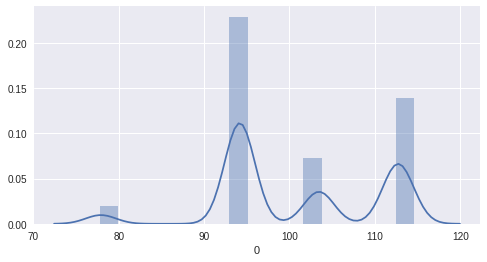

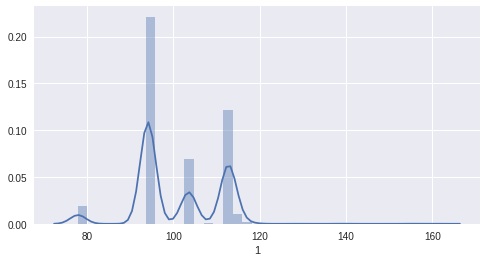

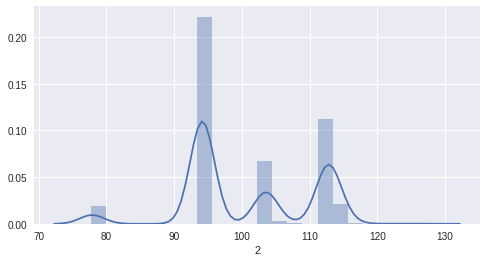

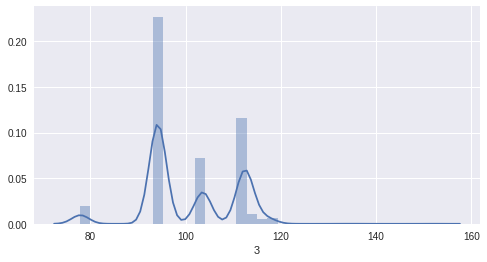

In [15]:
for d in S_train2.columns:
    plt.figure(figsize=(8,4))
    sns.distplot(S_train2[d])
    plt.show()

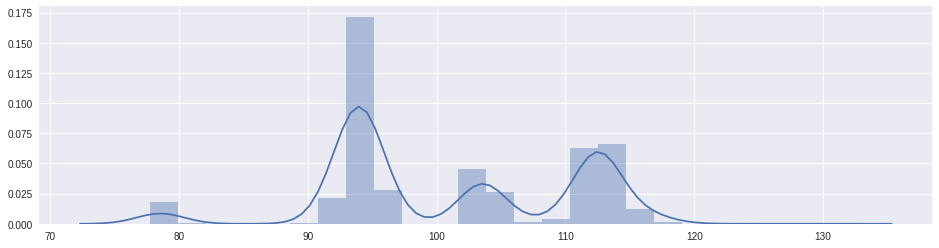

In [58]:
#create submission file
#only knows 'ID' and y_pred
model.fit(S_train, y_train)
y_pred = model.predict(S_test)

output = pd.DataFrame({'id': test_id.astype(np.int32), 'y': y_pred})
output.to_csv(os.path.join(OUTPUT,'0.5733 cv.csv'), index = False)

plt.figure(figsize=(16,4))
sns.distplot(y_pred)
plt.show()

In [12]:
y_pred.shape

(4209,)